In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [2]:
df = pd.read_csv('lung_cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


In [4]:
df.shape

(3000, 16)

Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df[df.duplicated(keep=False) ]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
962,M,53,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,NO
1051,M,50,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,YES
1476,M,53,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,NO
2039,M,50,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,YES


In [8]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    1518
NO     1482
Name: count, dtype: int64

In [10]:
for col in df.select_dtypes('object'):
    print(f"{col}: {df[col].unique()}")

GENDER: ['M' 'F']
SMOKING: ['Yes' 'No']
YELLOW_FINGERS: ['Yes' 'No']
ANXIETY: ['Yes' 'No']
PEER_PRESSURE: ['No' 'Yes']
CHRONIC_DISEASE: ['No' 'Yes']
FATIGUE: ['Yes' 'No']
ALLERGY: ['No' 'Yes']
WHEEZING: ['No' 'Yes']
ALCOHOL_CONSUMING: ['No' 'Yes']
COUGHING: ['No' 'Yes']
SHORTNESS_OF_BREATH: ['No' 'Yes']
SWALLOWING_DIFFICULTY: ['No' 'Yes']
CHEST_PAIN: ['Yes' 'No']
LUNG_CANCER: ['NO' 'YES']


Encoding

In [11]:
feature_values={'yes':1,'no':0}
cols_to_map=df.columns.drop(['AGE', 'GENDER'])
for col in cols_to_map:
        if df[col].dtype=='object':
                unique_vals = df[col].astype(str).str.strip().str.lower().unique()
                if 'yes' in unique_vals and 'no' in unique_vals :
                        df[col] = df[col].astype(str).str.strip().str.lower().map(feature_values)

In [12]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,0,0,1,0,0,0,0,0,0,1,0
1,F,55,1,0,0,1,1,0,0,0,1,1,1,0,0,0
2,F,78,0,0,1,1,1,0,1,0,1,1,0,1,1,1
3,M,60,0,1,1,1,0,1,0,1,1,0,1,0,0,1
4,F,80,1,1,0,1,1,0,1,0,1,1,1,1,0,0


In [13]:
df['GENDER'] = df['GENDER'].astype(str).str.strip().str.upper().map({'M': 1, 'F': 0})

In [14]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,0,0,1,0,0,0,0,0,0,1,0
1,0,55,1,0,0,1,1,0,0,0,1,1,1,0,0,0
2,0,78,0,0,1,1,1,0,1,0,1,1,0,1,1,1
3,1,60,0,1,1,1,0,1,0,1,1,0,1,0,0,1
4,0,80,1,1,0,1,1,0,1,0,1,1,1,1,0,0


Data Splitting

In [15]:
X = df.drop(columns='LUNG_CANCER')
y = df['LUNG_CANCER']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling (for AGE column)

In [17]:
scaler = MinMaxScaler()
X_train['AGE_scaled'] = scaler.fit_transform(X_train[['AGE']])
X_test['AGE_scaled'] = scaler.transform(X_test[['AGE']])


In [19]:
X_train = X_train.drop(columns='AGE')
X_test = X_test.drop(columns='AGE')

Model Training / Cross-Validation / Model Selection

KNeighborsClassifier()
___________________________
0.4922222222222222
              precision    recall  f1-score   support

           0       0.49      0.48      0.48       445
           1       0.50      0.50      0.50       455

    accuracy                           0.49       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.49      0.49      0.49       900



<Figure size 800x600 with 0 Axes>

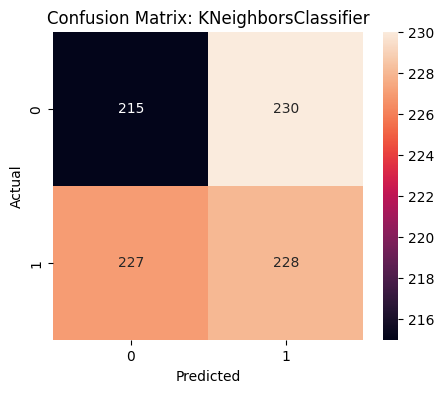

Cross-val Accuracy (5-fold) 0.5261904761904761
SVC(probability=True)
___________________________
0.4888888888888889
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       445
           1       0.49      0.45      0.47       455

    accuracy                           0.49       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.49      0.49      0.49       900



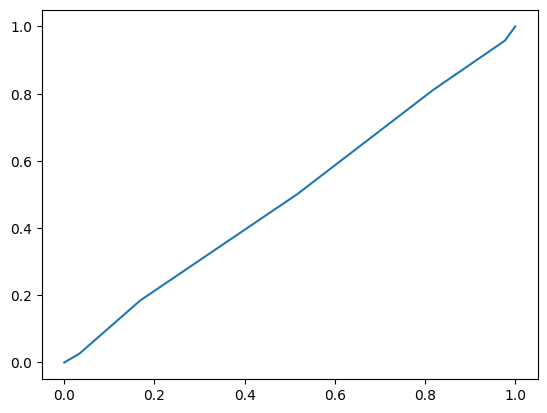

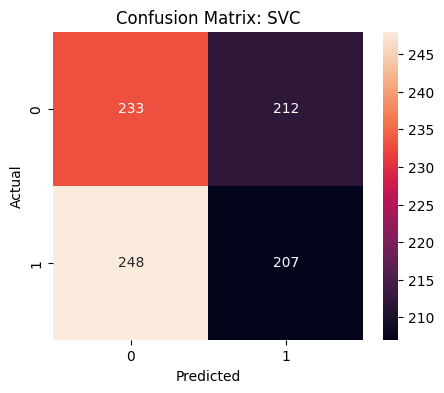

Cross-val Accuracy (5-fold) 0.5085714285714286
GaussianNB()
___________________________
0.5055555555555555
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       445
           1       0.51      0.53      0.52       455

    accuracy                           0.51       900
   macro avg       0.51      0.51      0.51       900
weighted avg       0.51      0.51      0.51       900



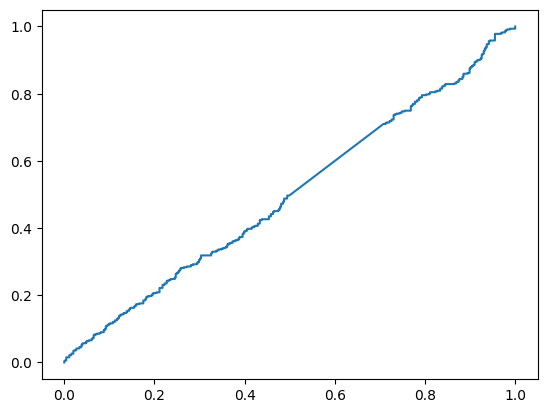

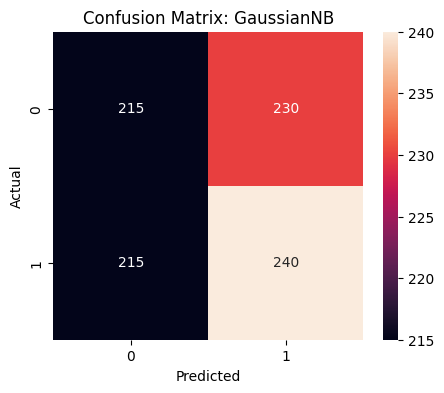

Cross-val Accuracy (5-fold) 0.5199999999999999
DecisionTreeClassifier()
___________________________
0.5155555555555555
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       445
           1       0.52      0.52      0.52       455

    accuracy                           0.52       900
   macro avg       0.52      0.52      0.52       900
weighted avg       0.52      0.52      0.52       900



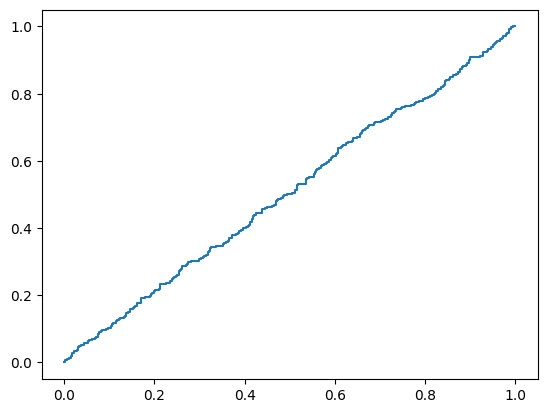

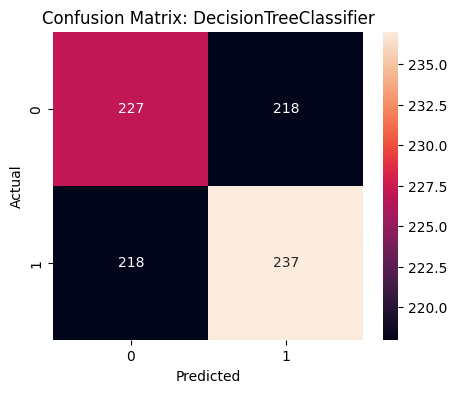

Cross-val Accuracy (5-fold) 0.5152380952380952
RandomForestClassifier()
___________________________
0.4922222222222222
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       445
           1       0.50      0.51      0.50       455

    accuracy                           0.49       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.49      0.49      0.49       900



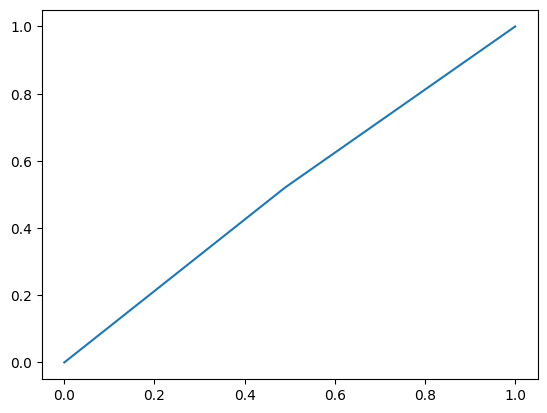

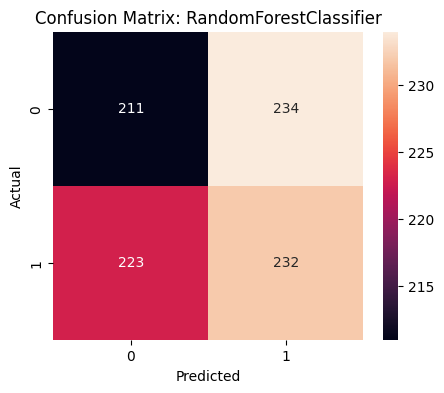

Cross-val Accuracy (5-fold) 0.518095238095238
LogisticRegression()
___________________________
0.5033333333333333
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       445
           1       0.51      0.53      0.52       455

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.50      0.50      0.50       900



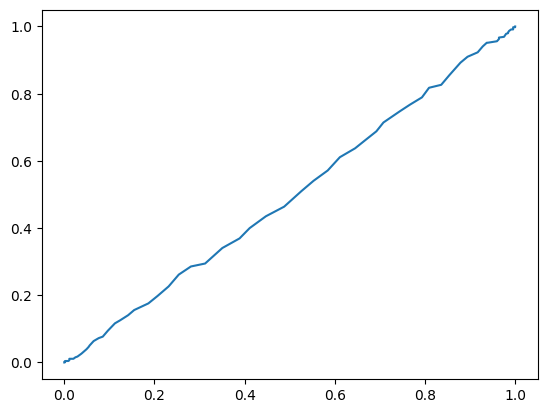

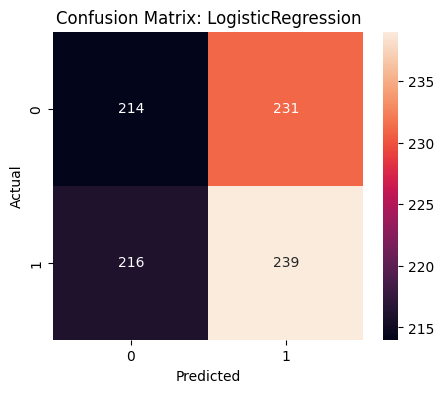

Cross-val Accuracy (5-fold) 0.5195238095238095


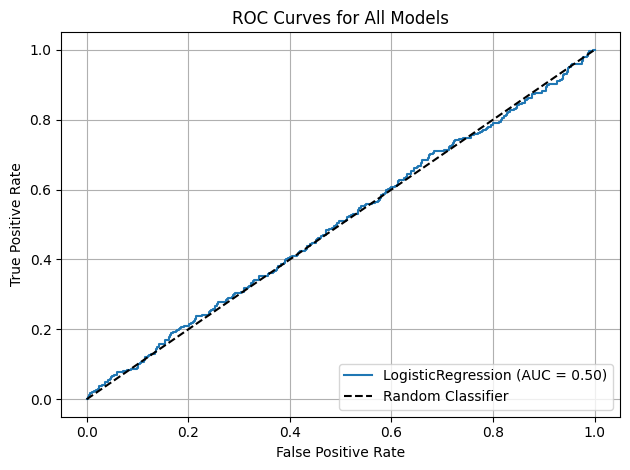

,Model,Accuracy,CrossVal,AUC
3,DecisionTreeClassifier,0.515556,0.516190,0.515496
2,GaussianNB,0.505556,0.520000,0.505806
5,LogisticRegression,0.503333,0.519524,0.502576
1,SVC,0.488889,0.508571,0.497896
4,RandomForestClassifier,0.492222,0.527143,0.495286
0,KNeighborsClassifier,0.492222,0.526190,0.494785


In [22]:
models = [KNeighborsClassifier(), SVC(probability=True), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
results = []

plt.figure(figsize=(8, 6))
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(model)
    print("_"*27)

    #Accuracy & classification report
    
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred , zero_division=0))
    
    #Confusion matrix

    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve 

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    else:  # For SVM without `predict_proba`
        y_proba = model.decision_function(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_proba)

    model_auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {model_auc:.2f})")


    # Cross-Validation

    print ("Cross-val Accuracy (5-fold)", cross_val_score(model, X_train, y_train, cv=5).mean())
    print("="*50)

    # Results stored

    results.append({
        "Model": model.__class__.__name__,
        "Accuracy": accuracy_score(y_test, y_pred),
        "CrossVal": cross_val_score(model, X_train, y_train, cv=5).mean(),
        "AUC": model_auc,
    })
    pd.DataFrame(results).sort_values("AUC", ascending=False)

# Final ROC Plot

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#Final comparison table 

results_df = pd.DataFrame(results).sort_values("AUC", ascending=False)
display(results_df)


Hyperparameter Tuning

In [27]:
# Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,scoring = { 'accuracy': 'accuracy','roc_auc': 'roc_auc'
},  refit='roc_auc', n_jobs=-1, return_train_score=True)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Score: 0.549453474887947
